<a href="https://colab.research.google.com/github/Abbta/adlfpae/blob/main/Exercise_6_2_KERAS_complicated_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 6.2
## Interpolation
In this task, we implement a simple NN to learn a complicated function.

In [1]:
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

layers = keras.layers

### Generation of data

In [2]:
def some_complicated_function(x):
    return (
        (np.abs(x)) ** 0.5
        + 0.1 * x
        + 0.01 * x ** 2
        + 1
        - np.sin(x)
        + 0.5 * np.exp(x / 10.0)
        ) / (0.5 + np.abs(np.cos(x)))

Let's simulate the train data

In [3]:
N_train = 10 ** 4  # number of training samples
# Note: "[:, np.newaxis]" reshapes array to (N,1) as required by our DNN (we input one feature per sample)
xtrain = np.random.uniform(-10, 10, N_train)[:, np.newaxis]
ytrain = some_complicated_function(xtrain) + np.random.standard_normal(xtrain.shape)  # train data includes some noise

In [4]:
print("xtrain.shape", xtrain.shape)
print("ytrain.shape", ytrain.shape)

xtrain.shape (10000, 1)
ytrain.shape (10000, 1)


Simulate test data

In [5]:
N_test = 10000  # number of testing samples
xtest = np.linspace(-10, 10, N_test)
ytest = some_complicated_function(xtest)

In [6]:
print("xtest.shape", xtest.shape)
print("ytest.shape", ytest.shape)

xtest.shape (10000,)
ytest.shape (10000,)


### Define Model

Define the number of nodes, the number of layers, and choose an activation function.
Use `keras.regularizers` to use parameter norm penalties or add a dropout layer via `layers.Dropout(fraction)`.

You may use the skeleton below:

In [12]:
nb_nodes = 150
nb_layers = 5
activation = "relu"

model = keras.models.Sequential(name="1Dfit")
regularizer=keras.regularizers.L2(l2=0.003)

model.add(layers.Dense(nb_nodes, activation=activation, input_dim=xtrain.shape[1])) #First layer
for _ in range(nb_layers):
  model.add(layers.Dense(nb_nodes, activation=activation, kernel_regularizer=regularizer))  # hidden layers

  model.add(layers.Dropout(0.01))

model.add(layers.Dense(1))  # final layer

print(model.summary())

Model: "1Dfit"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                     │ (None, 150)                 │             300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 150)                 │          22,650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 150)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 150)                 │          22,650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 150)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 150)                 │          22,650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 150)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 150)                 │          22,650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 150)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 150)                 │          22,650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 150)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 1)                   │             151 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 113,701 (444.14 KB)

 Trainable params: 113,701 (444.14 KB)

 Non-trainable params: 0 (0.00 B)

None


### Compile the model (set an objective and choose an optimizer)

Choose an optimizer from `keras.optimizers`, e.g., `adam = keras.optimizers.Adam(learning_rate=0.001)`.

Further, choose the correct objective (loss) for this <b>regression task</b>.

In [13]:
abe = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss="mse", optimizer=abe)

### Train the model

Train the network for a couple of epochs and save the model several times in between.

In [16]:
epochs = 100
save_period = 10   # after how many epochs the model should be saved?

chkpnt_saver = keras.callbacks.ModelCheckpoint("weights-{epoch:02d}.weights.h5", save_weights_only=True, save_freq=save_period)

results = model.fit(
    xtrain,
    ytrain,
    batch_size=64,
    epochs=epochs,
    verbose=1,
    callbacks=[chkpnt_saver]
    )

Epoch 1/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.5342
Epoch 2/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.3818
Epoch 3/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.2395
Epoch 4/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.0884
Epoch 5/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1.9635
Epoch 6/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.8646
Epoch 7/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.8113
Epoch 8/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.9227
Epoch 9/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.6126
Epoch 10/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.7196
Epoch 11/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.7697
Epoch 12/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.5807
Epoch 13/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.6415
Epoch 14/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.6836
Epoch 15/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1

Compare the performance of the model during the training. You may use the skeleton below:

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


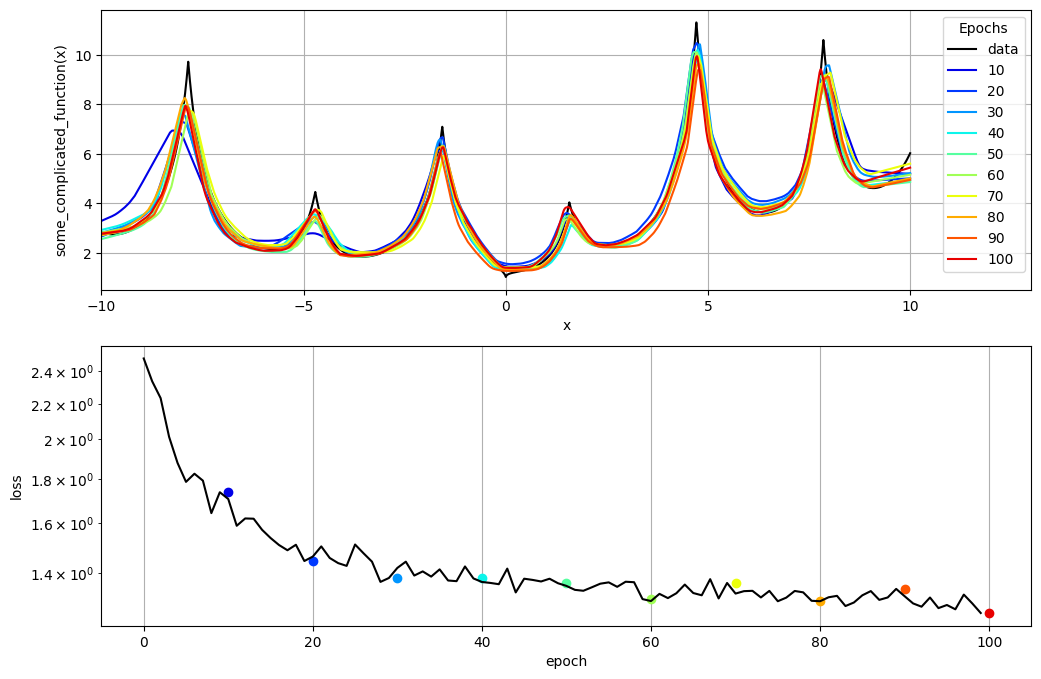

In [17]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12, 8))

ax1.plot(xtest, ytest, color="black", label="data")
saved_epochs = range(save_period, epochs + 1, save_period)

colors = [plt.cm.jet((i + 1) / float(len(saved_epochs) + 1)) for i in range(len(saved_epochs))]

for i, epoch in enumerate(saved_epochs):
    model.load_weights("weights-{epoch:02d}.weights.h5".format(epoch=epoch))
    ypredict = model.predict(xtest).squeeze()
    ax1.plot(xtest.squeeze(), ypredict, color=colors[i], label=epoch)
    ax2.plot(epoch, results.history["loss"][epoch - 1], color=colors[i], marker="o")

ax1.set(xlabel="x", ylabel="some_complicated_function(x)", xlim=(-10, 13), title="")
ax1.grid(True)
ax1.legend(loc="upper right", title="Epochs")

ax2.plot(results.history["loss"], color="black")
ax2.set(xlabel="epoch", ylabel="loss")
ax2.grid(True)
ax2.semilogy()

plt.show()

## Note
Does not hit the very top of all peaks but that is fine. Loss decreases with more epochs but flattens out. There is still some training that can be done berfore overfit, but not much.